In [3]:
# =============================================================================
# PROBLEM B2
#
# Build a classifier for the Fashion MNIST dataset.
# The test will expect it to classify 10 classes.
# The input shape should be 28x28 monochrome. Do not resize the data.
# Your input layer should accept (28, 28) as the input shape.
#
# Don't use lambda layers in your model.
#
# Desired accuracy AND validation_accuracy > 83%
# =============================================================================

import tensorflow as tf
from keras.datasets import fashion_mnist
from matplotlib import pyplot
from tensorflow.keras.optimizers import RMSprop


def solution_B2():
    (x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
    for i in range(9):  
     pyplot.subplot(330 + 1 + i)
     pyplot.imshow(x_train[i+100], cmap=pyplot.get_cmap('gray'))
     pyplot.show()


    # NORMALIZE YOUR IMAGE HERE
    x_train = x_train.reshape(60000,28,28,1)
    x_train = x_train/255
    x_test = x_test.reshape(10000,28,28,1)
    x_test = x_test /255

    # DEFINE YOUR MODEL HERE
    class CustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
          if (logs.get("accuracy")>0.91):
            print("\nReached 91% accuracy so cancelling training!")
            self.model.stop_training = True
    
    callbacks = CustomCallback()
    model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),input_shape = (28,28,1),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation = "relu"),
                                    tf.keras.layers.Dense(10, activation = "softmax")

    ])

  

    # COMPILE MODEL HERE
    
    model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = RMSprop(learning_rate = 0.001),
    metrics = ["accuracy"]
      )
    # TRAIN YOUR MODEL HERE

    model.fit(x_train,y_train,epochs = 10,
          verbose = 1,
          validation_data = [x_test,y_test],
          callbacks = callbacks)

    return model




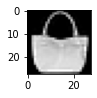

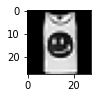

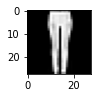

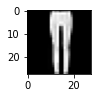

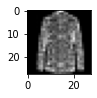

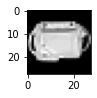

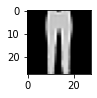

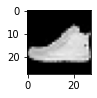

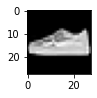

Epoch 1/10
1875/1875 [==============================] - 82s 43ms/step - loss: 0.4191 - accuracy: 0.8480 - val_loss: 0.3248 - val_accuracy: 0.8835
Epoch 2/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2807 - accuracy: 0.8988 - val_loss: 0.2902 - val_accuracy: 0.8964
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2451 - accuracy: 0.9102
Reached 91% accuracy so cancelling training!
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2451 - accuracy: 0.9102 - val_loss: 0.3259 - val_accuracy: 0.8828


In [4]:
# The code below is to save your model as a .h5 file.
# It will be saved automatically in your Submission folder.
if __name__ == '__main__':
    model = solution_B2()
    model.save("model_B2.h5")
